In [ ]:
# Stable Diffusion 설치
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.3 

In [ ]:
import torch
from diffusers import StableDiffusionControlNetPipeline
from diffusers.utils import load_image

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving IMG_0271-26040.jpg to IMG_0271-26040.jpg


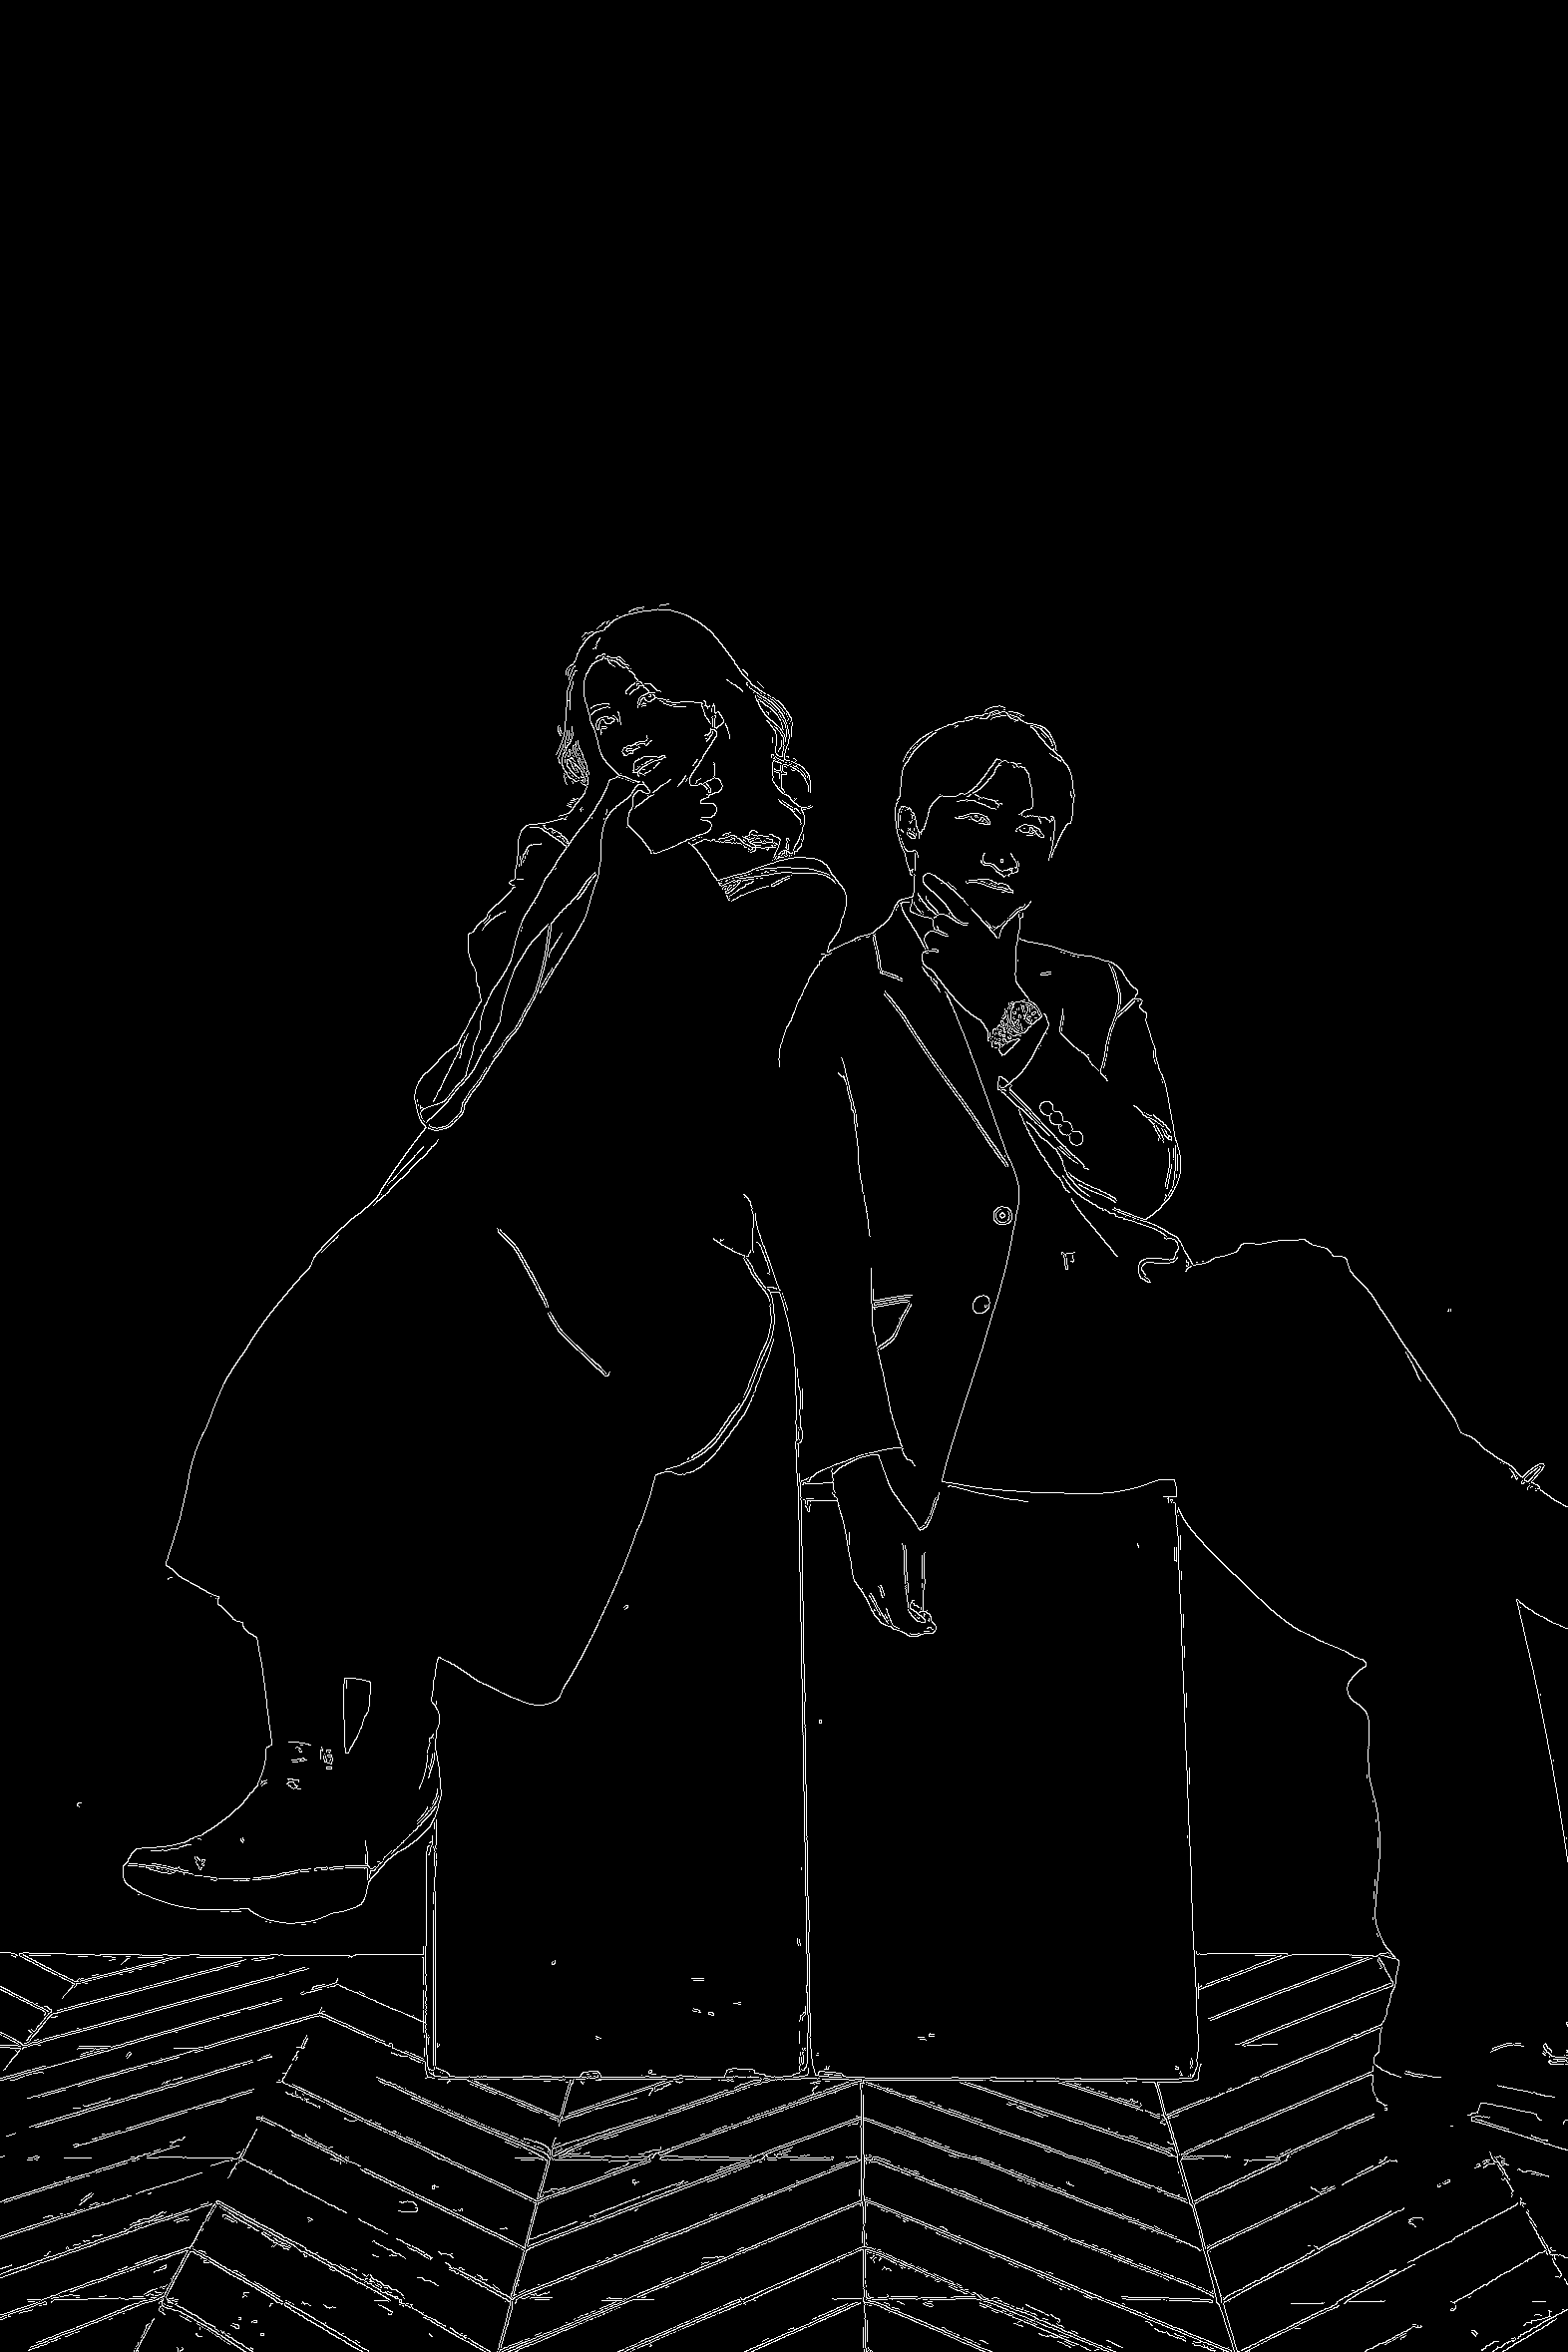

In [ ]:
import cv2
from PIL import Image
import numpy as np

# 이미지를 NumPy 배열로 변환합니다.
img = np.array(img)

# threshold를 지정합니다.
low_threshold = 100
high_threshold = 200

# 윤곽선을 검출합니다.
image = cv2.Canny(img, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)  # NumPy 배열을 PIL 이미지로 변환합니다.


In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

canny_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
canny_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=canny_controlnet, torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
from diffusers import UniPCMultistepScheduler
canny_pipe.scheduler = UniPCMultistepScheduler.from_config(canny_pipe.scheduler.config)
canny_pipe = canny_pipe.to("cuda")

generator = torch.manual_seed(0)

canny_image = canny_pipe(
    prompt="robots are sitting on the box",
    num_inference_steps=20,
    generator=generator,
    image=canny_image
).images[0]

  0%|          | 0/20 [00:00<?, ?it/s]

뭐지... 이.. 난해한 그림은

In [ ]:
!pip install controlnet-aux==0.0.1

In [ ]:
from diffusers.utils import load_image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMG_0271-26040.jpg to IMG_0271-26040 (1).jpg


In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel

openpose_controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16)
openpose_pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=openpose_controlnet, torch_dtype=torch.float16
)

config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
from diffusers import UniPCMultistepScheduler
import torch

# 스케줄러 설정
openpose_pipe.scheduler = UniPCMultistepScheduler.from_config(openpose_pipe.scheduler.config)

# CUDA로 모델 이동
openpose_pipe = openpose_pipe.to("cuda")

# ✅ 시드 고정 (동일한 결과 생성)
generator = torch.Generator(device="cuda").manual_seed(42)

# ✅ 프롬프트 설정
prompt = "a person doing a dynamic pose, full body, detailed clothing, high quality, professional photo"
negative_prompt = "low quality, blurry, distorted, extra limbs"

# ✅ 입력 이미지
images = openpose_image  # 보통 openpose 이미지에서 받아온 입력 이미지일 거야

# ✅ 이미지 생성
openpose_image1 = openpose_pipe(
    prompt=prompt,
    image=images,
    negative_prompt=negative_prompt,
    generator=generator
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

무서워.... 손이 이상해.....

In [ ]:
from diffusers.utils import load_image
from PIL import Image
import cv2
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMG_0273-26042.jpg to IMG_0273-26042.jpg


In [ ]:
low_threshold = 100
high_threshold = 200

In [ ]:
canny_image = np.array(img)

In [ ]:
canny_image= cv2.Canny(canny_image, low_threshold, high_threshold)



In [ ]:
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

In [ ]:
canny_image = np.stack([canny_image]*3, axis=-1)

In [ ]:
canny_image = Image.fromarray(canny_image)

In [ ]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMG_0319-26088.jpg to IMG_0319-26088.jpg


In [ ]:
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")

cuda


In [ ]:
openpose_image = openpose(img)

In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

In [ ]:
controlnets = [
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose", torch_dtype=torch.float16),
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
]

In [ ]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnets,
    torch_dtype=torch.float16
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

In [ ]:
prompt = "two cats are sitting on the box, 4k, detailed"
negative_prompt = "low quality, blurry, distorted, extra limbs, bad anatomy"

In [ ]:
generator = torch.Generator(device="cuda").manual_seed(42)


In [ ]:
images = [openpose_image, canny_image]


In [ ]:
from PIL import Image

# 이미지 크기를 동일하게 맞춰줌 (매우 중요!)
openpose_image = openpose_image.resize((512, 512))
canny_image = canny_image.resize((512, 512))

images = [openpose_image, canny_image]

# 파이프라인 실행
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    image=images,
    generator=generator,
    num_inference_steps=30
).images[0]

  0%|          | 0/30 [00:00<?, ?it/s]

ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

#회고

* 재미있었다! 내가 설정한대로 나오진 않지만 ㅋㅋㅋㅋㅋㅋㅋㅋ
* 프롬프트를 짜는 기술의 중요성이 높아질 것 같다.
* 마지막 고양이 짤이 제일 웃기다 ㅋㅋ